In [1]:
import os.path
import random

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.utils as vutils
from IPython.core.display import HTML
from matplotlib import animation
import matplotlib
from tqdm.auto import tqdm

matplotlib.rcParams['animation.embed_limit'] = 2**128
from torch.utils.data import DataLoader
from torchvision import transforms
from torch import nn

In [24]:
IMG_SIZE = (64, 64)
IMG_CHANNELS = 3
LATENT_SPACE_DIM = 1024
GENERATOR_FEATURES_SIZE = 64
DISCRIMINATOR_FEATURES_SIZE = 64

manualSeed = 1234
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.cuda.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Random Seed:  1234


In [25]:
class Generator(nn.Module):
    def __init__(self, latent_space_dim):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(latent_space_dim, GENERATOR_FEATURES_SIZE * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(GENERATOR_FEATURES_SIZE * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(GENERATOR_FEATURES_SIZE * 8, GENERATOR_FEATURES_SIZE * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(GENERATOR_FEATURES_SIZE * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( GENERATOR_FEATURES_SIZE * 4, GENERATOR_FEATURES_SIZE * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(GENERATOR_FEATURES_SIZE * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( GENERATOR_FEATURES_SIZE * 2, GENERATOR_FEATURES_SIZE, 4, 2, 1, bias=False),
            nn.BatchNorm2d(GENERATOR_FEATURES_SIZE),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( GENERATOR_FEATURES_SIZE, IMG_CHANNELS, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)
G = Generator(LATENT_SPACE_DIM)
G.load_state_dict(torch.load(os.path.join("GANs", "DC-GAN_1024", "generator"), map_location=torch.device('cpu')))

<All keys matched successfully>

In [26]:
rng = np.random.default_rng(manualSeed)
z01 = rng.normal(size=(2, LATENT_SPACE_DIM))
zs = np.linspace(z01[0, :], z01[1, :], num=10)
zs = torch.Tensor(zs).unsqueeze(-1).unsqueeze(-1)

In [27]:
images_numpy = np.transpose(G(zs).detach().numpy(), (0, 2, 3, 1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Text(0.5, 0.98, 'Interpolation of 2 1024-dimensional latent vectors for DCGAN')

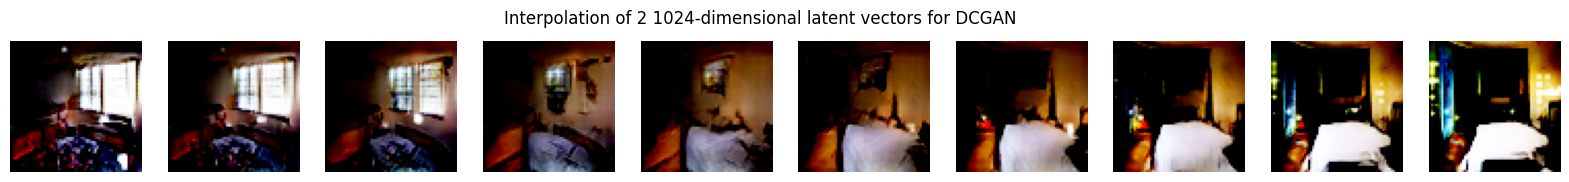

In [28]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(images_numpy[i])
    ax[i].set_axis_off()

plt.suptitle("Interpolation of 2 1024-dimensional latent vectors for DCGAN")